In [1]:
from astropy.table import Table

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

import numpy as np

from scipy.stats import ks_2samp, norm

IMAGE_FORMAT = 'eps'
#IMAGE_DIR = 'C:/Users/jacob/Documents/GitHub/RotationCurves/images'
IMAGE_DIR = '/Users/kellydouglass/Documents/Research/Rotation_curves/RotationCurves/images'

#master_table = Table.read( 'C:/Users/jacob/Documents/GitHub/RotationCurves/master_file.txt', format='ascii.ecsv')
master_table = Table.read('/Users/kellydouglass/Documents/Research/Rotation_curves/RotationCurves/master_file.txt', 
                          format='ascii.ecsv')

###########################################################################
# Hard-coded entry for the bins for the histrogram plots at the end of this
#    function.
#--------------------------------------------------------------------------
hist_range = ( 0, 60)
BINS = np.linspace( hist_range[0], hist_range[1], 13)
###########################################################################

In [2]:
###########################################################################
# Initialize the master arrays that will hold the wall and void mass ratios
#    for plotting the histogram.
#--------------------------------------------------------------------------
dm_to_stellar_mass_ratio_wall = []
dm_to_stellar_mass_ratio_void = []
###########################################################################


###########################################################################
# Split galaxies into "walls" and "voids"
#--------------------------------------------------------------------------
vboolean = master_table['vflag'].data == 1
wboolean = master_table['vflag'].data == 0

void_table = master_table[vboolean]
wall_table = master_table[wboolean]
###########################################################################


###########################################################################
# Separate the mass ratios according to wall or void.
#--------------------------------------------------------------------------
dm_to_stellar_mass_ratio_wall = wall_table['dmMass_to_sMass_ratio'].data
dm_to_stellar_mass_ratio_void = void_table['dmMass_to_sMass_ratio'].data
###########################################################################


###########################################################################
# Lists cannot be raised to powers, and this operation is needed to find
#    RMS of the data in question. Thus, the mass ratio lists are converted
#    into np.array() instances here.
#--------------------------------------------------------------------------
dm_to_stellar_mass_ratio_wall = np.array( dm_to_stellar_mass_ratio_wall)
dm_to_stellar_mass_ratio_void = np.array( dm_to_stellar_mass_ratio_void)
###########################################################################


###########################################################################
# Calculate the mean, RMS, and standard deviation for the void, wall, and
#    total distributions in the histogram below.
#--------------------------------------------------------------------------
#    ratio_mean = np.mean( dm_to_stellar_mass_ratio_list)
#    ratio_stdev = np.std( dm_to_stellar_mass_ratio_list)
#    ratio_rms = np.sqrt( np.mean( dm_to_stellar_mass_ratio_list**2))

# ratio_wall_mean = np.mean( dm_to_stellar_mass_ratio_wall)
# ratio_wall_stdev = np.std( dm_to_stellar_mass_ratio_wall)
# ratio_wall_rms = np.sqrt( np.mean( dm_to_stellar_mass_ratio_wall**2))

# ratio_void_mean = np.mean( dm_to_stellar_mass_ratio_void)
# ratio_void_stdev = np.std( dm_to_stellar_mass_ratio_void)
# ratio_void_rms = np.sqrt( np.mean( dm_to_stellar_mass_ratio_void**2))
###########################################################################

## Plotting function

In [27]:
def DM_SM_hist(void_ratios, wall_ratios, plot_title='$M_{DM}$ / $M_*$ distribution', save_fig=False, file_suffix=''):
    ###########################################################################
    # Histogram the dark matter to stellar mass ratios as separated by wall
    #    versus void as well as the total distribution.
    #--------------------------------------------------------------------------
    #plt.rc('text', usetex=True)
    plt.rc('font', size=16)#family='serif')
    lwidth = 2 # Line width used in plots

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), tight_layout=True)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)

    #    plt.hist( dm_to_stellar_mass_ratio_list,
    #             BINS, color='green', density=True, alpha=0.9)
    #    p = norm.pdf(x, ratio_mean, ratio_stdev)
    #    plt.plot(x, p, 'g--', linewidth=2)
    #    plt.axvline( ratio_mean, color='green', linestyle='-', linewidth=1.5)
    #    plt.axvline( ratio_mean + ratio_stdev,
    #                color='green', linestyle=':', linewidth=1)
    #    plt.axvline( ratio_mean - ratio_stdev,
    #                color='green', linestyle=':', linewidth=1)
    #    plt.axvline( ratio_mean + 2*ratio_stdev,
    #                color='green', linestyle=':', linewidth=1)
    #    plt.axvline( ratio_mean - 2*ratio_stdev,
    #                color='green', linestyle=':', linewidth=1)
    #    _, mean_ratio_ = plt.ylim()
    #    plt.text(ratio_mean + ratio_mean/10,
    #         mean_ratio_ - mean_ratio_/10,
    #         'Mean: {:.2f}'.format( ratio_mean))

    ax1.hist( void_ratios, BINS, color='r', range=hist_range, density=True, 
             histtype='step', linewidth=lwidth, 
             label='Void: ' + str( len( void_ratios)))
    # p = norm.pdf(x, ratio_void_mean, ratio_void_stdev)
    # plt.plot(x, p, 'r--', linewidth=2)
    # plt.axvline( ratio_void_mean, color='red', linestyle='-', linewidth=1.5)
    # plt.axvline( ratio_void_mean + ratio_void_stdev,
    #             color='red', linestyle=':', linewidth=1)
    # plt.axvline( ratio_void_mean - ratio_void_stdev,
    #             color='red', linestyle=':', linewidth=1)
    # plt.axvline( ratio_void_mean + 2*ratio_void_stdev,
    #             color='red', linestyle=':', linewidth=1)
    # plt.axvline( ratio_void_mean - 2*ratio_void_stdev,
    #             color='red', linestyle=':', linewidth=1)
    # _, mean_void_ratio_ = plt.ylim()
    # plt.text(ratio_void_mean + ratio_void_mean/10,
    #      mean_void_ratio_ - mean_void_ratio_/10,
    #      'Mean: {:.2f}'.format( ratio_void_mean))

    ax1.hist( wall_ratios, BINS, color='k', range=hist_range, density=True, 
             histtype='step', linewidth=lwidth, linestyle=':', 
             label='Wall: ' + str( len( wall_ratios)))
    # p = norm.pdf(x, ratio_wall_mean, ratio_wall_stdev)
    # plt.plot(x, p, 'k--', linewidth=2)
    # plt.axvline( ratio_wall_mean, color='black', linestyle='-', linewidth=1.5)
    # plt.axvline( ratio_wall_mean + ratio_wall_stdev,
    #             color='black', linestyle=':', linewidth=1)
    # plt.axvline( ratio_wall_mean - ratio_wall_stdev,
    #             color='black', linestyle=':', linewidth=1)
    # plt.axvline( ratio_wall_mean + 2*ratio_wall_stdev,
    #             color='black', linestyle=':', linewidth=1)
    # plt.axvline( ratio_wall_mean - 2*ratio_wall_stdev,
    #             color='black', linestyle=':', linewidth=1)
    # _, mean_wall_ratio_ = plt.ylim()
    # plt.text(ratio_wall_mean + ratio_wall_mean/10,
    #      mean_wall_ratio_ - mean_wall_ratio_/10,
    #      'Mean: {:.2f}'.format( ratio_wall_mean))

    ax1.tick_params( axis='both', direction='in')
    ax1.yaxis.set_ticks_position('both')
    ax1.xaxis.set_ticks_position('both')
    ax1.set_ylabel('Galaxy fraction')
    ax1.set_xlabel(r'$M_{DM}$ / $M_{*}$')
    ax1.set_xlim( hist_range)
    #ax1.set_xticks( BINS)
    ax1.set_title(plot_title)

    #void_patch = mpatches.Patch( color='red', label='Void: ' + str( len( dm_to_stellar_mass_ratio_void)))
    #wall_patch = mpatches.Patch( color='black', label='Wall: ' + str( len( dm_to_stellar_mass_ratio_wall)), alpha=0.5)
    #plt.legend( handles = [ void_patch, wall_patch])
    ax1.legend()

    # textstr = '\n'.join((
    # #          r'STDEV: $%.2f$' % ( ratio_stdev, ),
    #       r'$STDEV_{wall}$: $%.2f$' % ( ratio_wall_stdev, ),
    #       r'$STDEV_{void}$: $%.2f$' % ( ratio_void_stdev, ),
    # #          r'RMS: $%.2f$' % ( ratio_rms, ),
    #       r'$RMS_{wall}$: $%.2f$' % ( ratio_wall_rms, ),
    #       r'$RMS_{void}$: $%.2f$' % ( ratio_void_rms, )))

    # props = dict( boxstyle='round', facecolor='cornsilk', alpha=0.6)

    # ax.text(0.72, 0.95, textstr,
    #         verticalalignment='top', horizontalalignment='left',
    #         transform=ax.transAxes,
    #         color='black', fontsize=8, bbox=props)
    '''
    plt.savefig( IMAGE_DIR + '/histograms/dm_to_stellar_mass_ratio_hist.' + IMAGE_FORMAT,
                format=IMAGE_FORMAT)
    '''
    #plt.show()
    #plt.close()
    ###########################################################################


    ###########################################################################
    # Histogram the dark matter to stellar mass ratios as CDF separated by wall
    #    versus void distributions.
    #--------------------------------------------------------------------------
    ks_stat, p_val = ks_2samp( wall_ratios, void_ratios)

    #dm_to_stellar_mass_cdf = plt.figure()
    ax2.hist( void_ratios, bins=1000, range=hist_range, density=True, 
             cumulative=True, histtype='step', color='r', linewidth=lwidth, label='Void')
    ax2.hist( wall_ratios, bins=1000, range=hist_range, density=True, 
             cumulative=True, histtype='step', color='k', linewidth=lwidth, linestyle=':', 
             label='Wall')

    ax2.tick_params( axis='both', direction='in')
    ax2.yaxis.set_ticks_position('both')
    ax2.xaxis.set_ticks_position('both')
    ax2.set_ylabel('Galaxy fraction')
    ax2.set_xlabel(r'$M_{DM}$ / $M_*$')
    ax2.set_xlim( hist_range)
    #ax2.set_xticks( BINS)
    ax2.set_title(plot_title)
    ax2.legend(loc='upper left')

    ax2.text( hist_range[1] * 0.65, 0.15, "p-val: " + "{:.{}f}".format( p_val, 3))
    
    if save_fig:
        plt.savefig( IMAGE_DIR + '/histograms/dm_to_stellar_mass_ratio_hist' + file_suffix + '.' + IMAGE_FORMAT,
                    format=IMAGE_FORMAT)
    
    plt.show()
    #plt.close()
    ###########################################################################

# Histogram of ratio of dark matter halo mass to stellar mass for all galaxies

/anaconda/envs/python3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


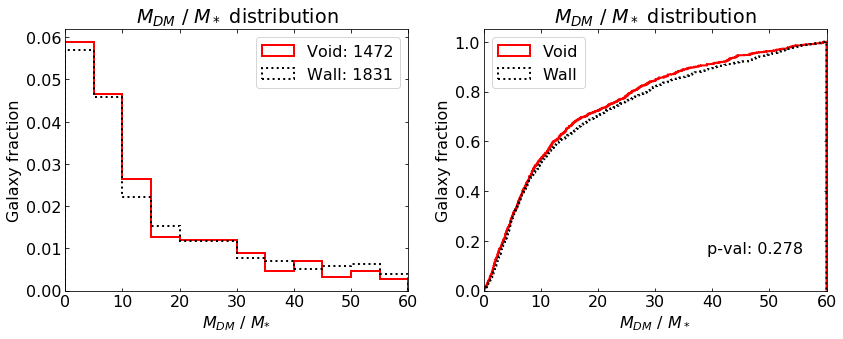

In [30]:
DM_SM_hist(dm_to_stellar_mass_ratio_void, dm_to_stellar_mass_ratio_wall, 
           save_fig=True, file_suffix='_all')

# Bin by absolute magnitude

### Dwarf galaxies (Mr > -17)

/anaconda/envs/python3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


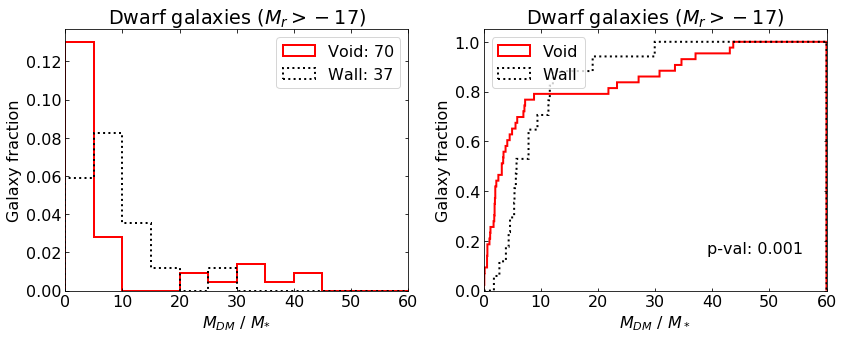

In [31]:
vboolean = void_table['rabsmag'].data >= -17
wboolean = wall_table['rabsmag'].data >= -17

###########################################################################
# Separate the mass ratios according to wall or void.
#--------------------------------------------------------------------------
dwarf_wall = wall_table['dmMass_to_sMass_ratio'][wboolean].data
dwarf_void = void_table['dmMass_to_sMass_ratio'][vboolean].data
###########################################################################

DM_SM_hist(dwarf_void, dwarf_wall, plot_title='Dwarf galaxies ($M_r > -17$)', save_fig=True, 
          file_suffix='_dwarf')

### Galaxies between -17 and -18 in Mr

/anaconda/envs/python3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


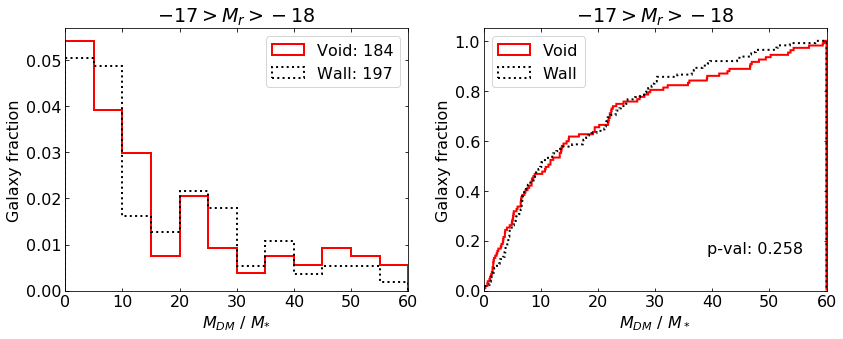

In [32]:
vboolean = np.logical_and(void_table['rabsmag'].data < -17, void_table['rabsmag'].data >= -18)
wboolean = np.logical_and(wall_table['rabsmag'].data < -17, wall_table['rabsmag'].data >= -18)

###########################################################################
# Separate the mass ratios according to wall or void.
#--------------------------------------------------------------------------
g17_18_wall = wall_table['dmMass_to_sMass_ratio'][wboolean].data
g17_18_void = void_table['dmMass_to_sMass_ratio'][vboolean].data
###########################################################################

DM_SM_hist(g17_18_void, g17_18_wall, plot_title='$-17 > M_r > -18$', save_fig=True, 
          file_suffix='_17-18')

### Galaxies between -18 and -19 in Mr

/anaconda/envs/python3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


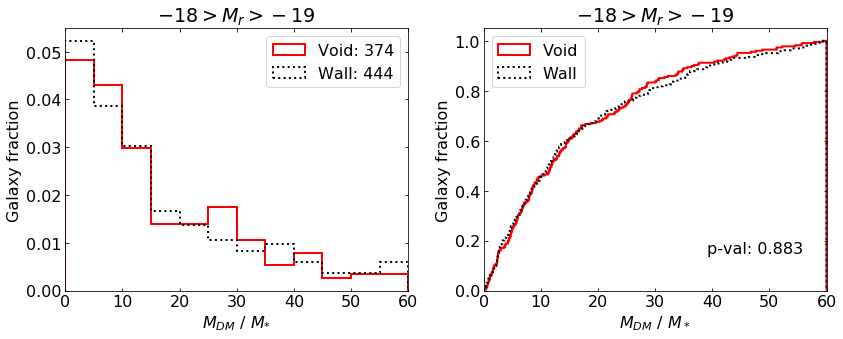

In [33]:
vboolean = np.logical_and(void_table['rabsmag'].data < -18, void_table['rabsmag'].data >= -19)
wboolean = np.logical_and(wall_table['rabsmag'].data < -18, wall_table['rabsmag'].data >= -19)

###########################################################################
# Separate the mass ratios according to wall or void.
#--------------------------------------------------------------------------
g18_19_wall = wall_table['dmMass_to_sMass_ratio'][wboolean].data
g18_19_void = void_table['dmMass_to_sMass_ratio'][vboolean].data
###########################################################################

DM_SM_hist(g18_19_void, g18_19_wall, plot_title='$-18 > M_r > -19$', save_fig=True, 
          file_suffix='_18-19')

### Galaxies between -19 and -20 in Mr

/anaconda/envs/python3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


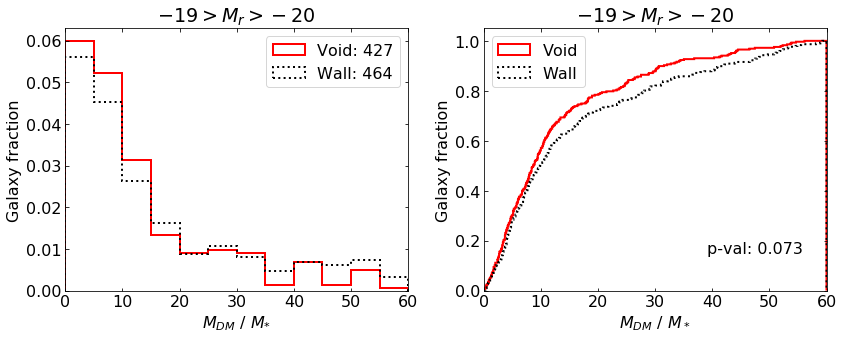

In [34]:
vboolean = np.logical_and(void_table['rabsmag'].data < -19, void_table['rabsmag'].data >= -20)
wboolean = np.logical_and(wall_table['rabsmag'].data < -19, wall_table['rabsmag'].data >= -20)

###########################################################################
# Separate the mass ratios according to wall or void.
#--------------------------------------------------------------------------
g19_20_wall = wall_table['dmMass_to_sMass_ratio'][wboolean].data
g19_20_void = void_table['dmMass_to_sMass_ratio'][vboolean].data
###########################################################################

DM_SM_hist(g19_20_void, g19_20_wall, plot_title='$-19 > M_r > -20$', save_fig=True, 
          file_suffix='_19-20')

### Galaxies with Mr < -20

/anaconda/envs/python3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


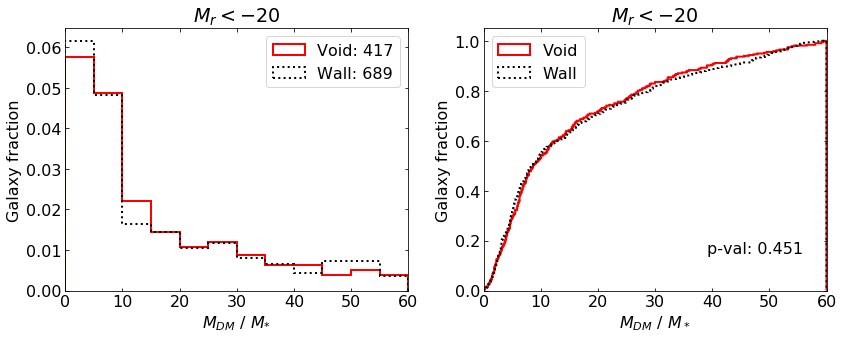

In [35]:
vboolean = void_table['rabsmag'].data < -20
wboolean = wall_table['rabsmag'].data < -20

###########################################################################
# Separate the mass ratios according to wall or void.
#--------------------------------------------------------------------------
g20_wall = wall_table['dmMass_to_sMass_ratio'][wboolean].data
g20_void = void_table['dmMass_to_sMass_ratio'][vboolean].data
###########################################################################

DM_SM_hist(g20_void, g20_wall, plot_title='$M_r < -20$', save_fig=True, 
          file_suffix='_bright')